# Homework 1

## Load data
Load the data and standardize all features values to a zero mean and a unit variance.

In [0]:
import numpy as np
import pickle
from sklearn import preprocessing

file = open('msd_data1.pickle', 'rb')
raw_data = pickle.load(file)
data = []
file.close()
for keys in raw_data:
    data.append(raw_data[keys])
    
# standardization
combine = [*data[0], *data[2]]
combine_scaled = preprocessing.scale(combine)
x_train = []
x_test = []
for i in range(0, combine_scaled.shape[0]):
    if i < 5000:
        x_train.append(combine_scaled[i])
    else:
        x_test.append(combine_scaled[i])
y_train = data[1]
y_test = data[3]

# Part1: myknn_regressor
## Q1.1: Create a knn regressor
Given a training dataset and a predefined k, the regressor is able to find k nearest neighbors of the testing data and apply a real-valued function to get the prediction.<br>
There are two choices of the function:<br>
1. equal weight: compute the mean directly<br>
2. remove outliers: compute the mean after removing outliers<br>
The second method is only allowed when k >= 10

In [0]:
def euclidean_distance(vec1, vec2):
    distance = np.sqrt(np.sum(np.power(vec1-vec2, 2)))
    return distance

def get_k_neighbor(x_train, x_test_item, k):
    distances = []
    neighbors = []
    for i in range(0, len(x_train)):
        current_distance = euclidean_distance(x_train[i], x_test_item)
        distances.append((i,current_distance))
    distances.sort(key = lambda d: (d[1], d[0]))
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors

def equal_weight(neighbors, y_train):
    sum = 0
    for i in range(len(neighbors)):
        sum += y_train[neighbors[i]]
    return sum/len(neighbors)

def remove_outlier(neighbors, y_train):
    raw_y_a = []
    for i in range(len(neighbors)):
        raw_y_a.append(y_train[neighbors[i]])
    sorted(raw_y_a)
    q1, q3 = np.percentile(raw_y_a, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    y_a = []
    for i in range(len(raw_y_a)):
        if raw_y_a[i] >= lower_bound and raw_y_a[i] <= upper_bound:
            y_a.append(raw_y_a[i])
    return (np.mean(y_a))

class myknn_regressor:
    def __init__(self, k, function):
        self.k = k
        self.function = function

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        y_prediction = []
        for i in range(len(x_test)):
            x_neighbors = get_k_neighbor(self.x_train, x_test[i], self.k)
            if self.function == 'remove_outliers' and self.k >= 10:
                y_prediction.append(remove_outlier(x_neighbors, self.y_train))
            else:
                y_prediction.append(equal_weight(x_neighbors, self.y_train))
        return y_prediction        

## Q1.2
- Use standardized data
- k = 20
- equal_weight

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# k = 20, equal weight
myknn_equal_weight = myknn_regressor(2, 'equal_weight')
myknn_equal_weight.fit(x_train, y_train)
ypred_equal_weight = myknn_equal_weight.predict(x_test[:10])
print(type(ypred_equal_weight))
# print("RMSE: ", sqrt(mean_squared_error(y_test, ypred_equal_weight)))
# print("First 20 predictions: ", ypred_equal_weight[0:20])

<class 'list'>


## Q1.3
- Use standardized data
- k = 20
- remove_outliers

In [0]:
# k = 20, remove outliers
myknn_remove_outliers = myknn_regressor(20, 'remove_outliers')
myknn_remove_outliers.fit(x_train, y_train)
ypred_remove_outliers = myknn_remove_outliers.predict(x_test)
print("RMSE: ", sqrt(mean_squared_error(y_test, ypred_remove_outliers)))
print("First 20 predictions: ", ypred_remove_outliers[0:20])

RMSE:  10.206852722356277
First 20 predictions:  [1993.35, 1994.0, 2000.65, 1992.7368421052631, 1992.8, 2000.0, 1988.1, 1991.65, 2002.25, 2003.9473684210527, 1999.75, 2000.9444444444443, 1995.55, 1997.2, 1998.611111111111, 1997.4, 1992.0, 2003.8333333333333, 2003.2, 1995.75]


# Part2: Tuning the Hyper-parameter
Use k = 1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200

In [0]:
from sklearn.neighbors import KNeighborsRegressor

In [0]:
unscaled_x_train = data[0]
unscaled_x_test = data[2]
k = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

## Case1: 
- Use standardized data
- Use knn regressor from klearn.neighbors.KNeighborsRegressor

In [0]:
rmse_case1 = []
for i in range(len(k)):
    knn = KNeighborsRegressor(n_neighbors = k[i], n_jobs = -1)
    knn.fit(x_train, y_train)
    ypred = knn.predict(x_test)
    rmse_case1.append(sqrt(mean_squared_error(y_test, ypred)))
    print("K:", k[i], " RMSE:", rmse_case1[i])

K: 1  RMSE: 13.96895367114755
K: 2  RMSE: 12.092787106370475
K: 3  RMSE: 11.37624392872823
K: 4  RMSE: 11.038971683691074
K: 5  RMSE: 10.870996274491125
K: 10  RMSE: 10.417184360469003
K: 15  RMSE: 10.322535792390608
K: 20  RMSE: 10.259587873464183
K: 25  RMSE: 10.237273230699664
K: 30  RMSE: 10.225737282121177
K: 35  RMSE: 10.194419815475015
K: 40  RMSE: 10.194883857847524
K: 45  RMSE: 10.199987105615993
K: 50  RMSE: 10.205220174008986
K: 55  RMSE: 10.208596366769251
K: 60  RMSE: 10.219969862063266
K: 80  RMSE: 10.227230909847169
K: 100  RMSE: 10.247051366124795
K: 120  RMSE: 10.259975237543218
K: 140  RMSE: 10.281837520069828
K: 160  RMSE: 10.30919225297764
K: 180  RMSE: 10.327653504223125
K: 200  RMSE: 10.349121530352226


## Case2: 
- Use unstandardized data
- Use knn regressor from klearn.neighbors.KNeighborsRegressor

In [0]:
rmse_case2 = []
for i in range(len(k)):
    knn = KNeighborsRegressor(n_neighbors = k[i], n_jobs = -1)
    knn.fit(unscaled_x_train, y_train)
    ypred = knn.predict(unscaled_x_test)
    rmse_case2.append(sqrt(mean_squared_error(y_test, ypred)))
    print("K:", k[i], " RMSE:", rmse_case2[i])

K: 1  RMSE: 14.923638966418345
K: 2  RMSE: 12.777499755429464
K: 3  RMSE: 12.075674967716129
K: 4  RMSE: 11.767805657810635
K: 5  RMSE: 11.466392632384432
K: 10  RMSE: 11.07746090040493
K: 15  RMSE: 10.888979137947995
K: 20  RMSE: 10.797788546734928
K: 25  RMSE: 10.79007301797969
K: 30  RMSE: 10.75026561256701
K: 35  RMSE: 10.717738719772289
K: 40  RMSE: 10.714437504678756
K: 45  RMSE: 10.698494013475852
K: 50  RMSE: 10.69110105960404
K: 55  RMSE: 10.682608734124413
K: 60  RMSE: 10.672535729098724
K: 80  RMSE: 10.662907517124493
K: 100  RMSE: 10.67701950452466
K: 120  RMSE: 10.683139638996407
K: 140  RMSE: 10.687017556442052
K: 160  RMSE: 10.691630026202155
K: 180  RMSE: 10.69071978380711
K: 200  RMSE: 10.698853374700175


## Case3: 
- Use standardized data
- Use myknn_regressor with "remove_outliers"

In [0]:
%%time
rmse_case3 = []
for i in range(len(k)):
    knn = myknn_regressor(k[i], 'remove_outliers')
    knn.fit(x_train, y_train)
    ypred = knn.predict(x_test)
    rmse_case3.append(sqrt(mean_squared_error(y_test, ypred)))
    print("K:", k[i], " RMSE:", rmse_case3[i])

K: 1  RMSE: 13.96895367114755
K: 2  RMSE: 12.092787106370475
K: 3  RMSE: 11.37624392872823
K: 4  RMSE: 11.038971683691074
K: 5  RMSE: 10.870996274491125
K: 10  RMSE: 10.462684302304634
K: 15  RMSE: 10.30104630294842
K: 20  RMSE: 10.206852722356277
K: 25  RMSE: 10.202399000051484
K: 30  RMSE: 10.147823416853143
K: 35  RMSE: 10.119056863101012
K: 40  RMSE: 10.085629015635236
K: 45  RMSE: 10.062587428930742
K: 50  RMSE: 10.072589942421185
K: 55  RMSE: 10.063029247859847
K: 60  RMSE: 10.070073493752366
K: 80  RMSE: 10.056971067115997
K: 100  RMSE: 10.061107003069466
K: 120  RMSE: 10.065367826901227
K: 140  RMSE: 10.08929130026124
K: 160  RMSE: 10.109615407419872
K: 180  RMSE: 10.114674173514931
K: 200  RMSE: 10.14736014185608
CPU times: user 1h 29min 39s, sys: 27.3 s, total: 1h 30min 6s
Wall time: 1h 35min 4s


## Plot

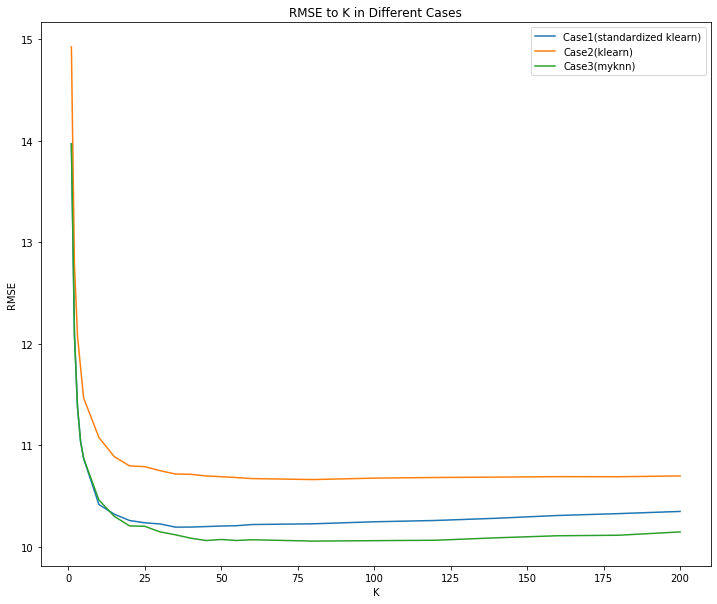

In [0]:
import matplotlib.pyplot as plot
plot.figure(figsize=(12,10))
plot.title("RMSE to K in Different Cases")
plot.xlabel("K")
plot.ylabel("RMSE")
plot.plot(k, rmse_case1, label = "Case1(standardized klearn)")
plot.plot(k, rmse_case2, label = "Case2(klearn)")
plot.plot(k, rmse_case3, label = "Case3(myknn)")
plot.legend()
plot.show()

## Observations
- Comparing klearn.neighbors.KNeighborsRegressor using standardized data and unstandardized data, the one with standardized data performed better than the other.
- Myknn regressor with removing outliers outperformed the other two regressors if k > 20(approximate)
- For klearn.neighbors.KNeighborsRegressor with standardized data, the best choice of k located between 25 to 50.
- For myknn regressor with removing outliers, the best choice of k located around 50.